In [2]:
# Standard
from pathlib import Path

# Extra
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.cm as cm

# Global utitlity functions are loaded from separate notebook:
%run utils.ipynb

In [3]:
REPORT_PATH = Path.cwd().parent / "reports" / "figures" # Figures for thesis
REPORT_PATH.mkdir(parents=True, exist_ok=True)

# Plotting
%matplotlib inline
utils_set_output_style()

In [4]:
def plot_metrics(df_plot, ticklabels=None):
    fig, axes = plt.subplots(
        ncols=2, nrows=1, figsize=(5.473, 5.473 / 17 * len(df_plot)), dpi=180
    )

    cm_ocsvm = cm.get_cmap("Blues")
    cm_siamese = cm.get_cmap("RdPu")

    n_ocsvm = len(df_plot[df_plot["group"] == "OCSVM"])
    n_siamese = len(df_plot[df_plot["group"] == "Siamese CNN"])

    colors = [cm_ocsvm(i) for i in np.linspace(0.4, 1, n_ocsvm)] + [
        cm_siamese(i) for i in np.linspace(0.4, 1, n_siamese)
    ]

    df_plot.plot.barh(
        x="approach", y="mean acc", ax=axes[0], legend=None, color=colors[::-1]
    )
    df_plot.plot.barh(
        x="approach", y="mean eer", ax=axes[1], legend=None, color=colors[::-1]
    )

    if ticklabels:
        for ax in axes:
            i = 0
            for tick in ax.yaxis.get_majorticklabels():
                tick.set_verticalalignment("bottom")
                ax.text(
                    -0.03,
                    i - 0.1,
                    ticklabels[i],
                    fontsize=5,
                    ha="right",
                    va="top",
                    alpha=0.6,
                )
                i += 1

    for ax in axes:
        for p in ax.patches:
            ax.annotate(
                f"{p.get_width():.3f}" if p.get_width() != 0 else " N/A",
                (p.get_width() + 0.01, p.get_y() + 0.12),
                fontsize=5,
            )

    axes[1].set_ylabel(None)
    axes[1].set_xlabel("Mean EER")
    axes[0].set_ylabel(None)
    axes[0].set_xlabel("Mean Accuracy")

    axes[0].set_xlim(0, 1.1)
    axes[1].set_xlim(0, 1.1)

    fig.text(
        0,
        0.38,
        "Siamese CNN",
        ha="center",
        va="center",
        rotation="vertical",
        fontsize=6,
        fontweight="bold",
    )

    fig.text(
        0,
        0.78,
        "OCSVM",
        ha="center",
        va="center",
        rotation="vertical",
        fontsize=6,
        fontweight="bold",
    )

    fig.tight_layout()

In [5]:
df_ocsvm_naive = pd.read_csv(Path.cwd() / "output" / "chapter-6-1-3-ocsvm" / "NAIVE-MINMAX-OCSVM_test_results.csv")
df_ocsvm_valid = pd.read_csv(Path.cwd() / "output" / "chapter-6-1-3-ocsvm" / "VALID-MINMAX-OCSVM_test_results.csv")

df_ocsvm_naive_robust = pd.read_csv(Path.cwd() / "output" / "chapter-6-1-3-ocsvm" / "NAIVE-ROBUST-OCSVM_test_results.csv")
df_ocsvm_valid_robust = pd.read_csv(Path.cwd() / "output" / "chapter-6-1-3-ocsvm" / "VALID-ROBUST-OCSVM_test_results.csv")

df_siamese_naive = pd.read_csv(Path.cwd() / "output" / "chapter-6-1-4-siamese-cnn" / "NAIVE-MINMAX-2D_test_results.csv")
df_siamese_valid = pd.read_csv(Path.cwd() / "output" / "chapter-6-1-4-siamese-cnn" / "VALID-MINMAX-2D_test_results.csv")

df_siamese_naive_robust = pd.read_csv(Path.cwd() / "output" / "chapter-6-1-4-siamese-cnn" / "NAIVE-ROBUST-2D_test_results.csv")
df_siamese_valid_robust = pd.read_csv(Path.cwd() / "output" / "chapter-6-1-4-siamese-cnn" / "VALID-ROBUST-2D_test_results.csv")

df_siamese_fcn = pd.read_csv(Path.cwd() / "output" / "chapter-6-1-4-siamese-cnn" / "VALID-FCN-ROBUST-FINAL_test_results.csv")

In [106]:
df_ocsvm_naive_robust.head()

,fit_time,score_time,test_eer,train_eer,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,owner
0,0.015621,0.031243,0.5,1.818989e-12,0.5,0.506944,0.0,1.0,0.0,0.506944,808022
1,0.000000,0.031243,0.5,1.818989e-12,0.5,0.506944,0.0,1.0,0.0,0.506944,808022
2,0.015621,0.031243,0.5,1.818989e-12,0.5,0.506944,0.0,1.0,0.0,0.506944,808022
3,0.015621,0.031243,0.5,1.818989e-12,0.5,0.506944,0.0,1.0,0.0,0.506944,808022
4,0.015621,0.015622,0.5,1.818989e-12,0.5,0.506944,0.0,1.0,0.0,0.506944,808022


In [6]:
df_plot = pd.DataFrame(
    [
        {
            "group": "OCSVM",
            "approach": "Centeno et al. (2018)",
            "mean eer": None,
            "mean acc": 0.869,  # Centeno et al. 2018, p. 6
        },
        {
            "group": "OCSVM",
            "approach": "naive min-max",
            "mean eer": df_ocsvm_naive["test_eer"].mean(),
            "mean acc": df_ocsvm_naive["test_accuracy"].mean(),
        },
        {
            "group": "OCSVM",
            "approach": "naive robust",
            "mean eer": df_ocsvm_naive_robust["test_eer"].mean(),
            "mean acc": df_ocsvm_naive_robust["test_accuracy"].mean(),
        },
        {
            "group": "OCSVM",
            "approach": "valid min-max",
            "mean eer": df_ocsvm_valid["test_eer"].mean(),
            "mean acc": df_ocsvm_valid["test_accuracy"].mean(),
        },
        {
            "group": "OCSVM",
            "approach": "valid robust",
            "mean eer": df_ocsvm_valid_robust["test_eer"].mean(),
            "mean acc": df_ocsvm_valid_robust["test_accuracy"].mean(),
        },
        {
            "group": "Siamese CNN",
            "approach": "Centeno et al. (2018)",
            "mean eer": None,
            "mean acc": 0.978,  # Centeno et al. 2018, p. 6
        },
        {
            "group": "Siamese CNN",
            "approach": "naive min-max",
            "mean eer": df_siamese_naive["test_eer"].mean(),
            "mean acc": df_siamese_naive["test_accuracy"].mean(),
        },
        {
            "group": "Siamese CNN",
            "approach": "naive robust",
            "mean eer": df_siamese_naive_robust["test_eer"].mean(),
            "mean acc": df_siamese_naive_robust["test_accuracy"].mean(),
        },
        {
            "group": "Siamese CNN",
            "approach": "valid min-max",
            "mean eer": df_siamese_valid["test_eer"].mean(),
            "mean acc": df_siamese_valid["test_accuracy"].mean(),
        },
        {
            "group": "Siamese CNN",
            "approach": "valid robust",
            "mean eer": df_siamese_valid_robust["test_eer"].mean(),
            "mean acc": df_siamese_valid_robust["test_accuracy"].mean(),
        },
        {
            "group": "Siamese CNN",
            "approach": "valid robust fcn",
            "mean eer": df_siamese_fcn["test_eer"].mean(),
            "mean acc": df_siamese_fcn["test_accuracy"].mean(),
        },
    ][::-1]
)

In [7]:
df_plot

,approach,group,mean acc,mean eer
0,valid robust fcn,Siamese CNN,0.653024,0.368350
1,valid robust,Siamese CNN,0.568630,0.448205
2,valid min-max,Siamese CNN,0.605077,0.411597
3,naive robust,Siamese CNN,0.521169,0.481169
4,naive min-max,Siamese CNN,0.900239,0.147307
5,Centeno et al. (2018),Siamese CNN,0.978000,NaN
6,valid robust,OCSVM,0.617534,0.407717
7,valid min-max,OCSVM,0.654262,0.369307
8,naive robust,OCSVM,0.500486,0.499754
9,naive min-max,OCSVM,0.863467,0.187926


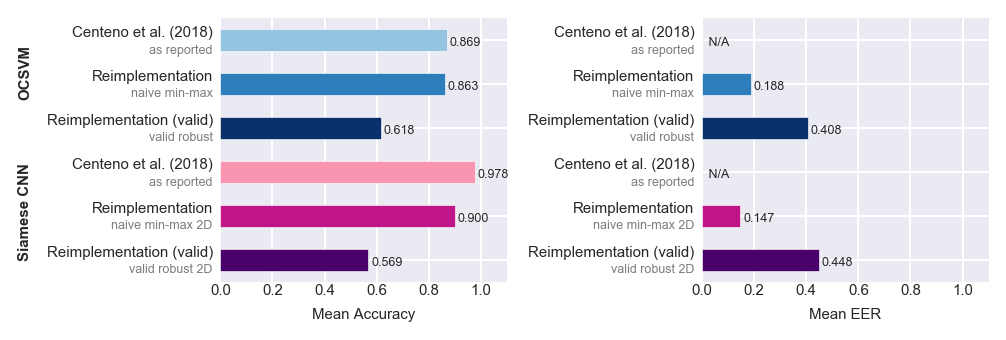

In [8]:
# Subset
df_plot_renamed = df_plot[
    df_plot["approach"].isin(["naive min-max", "Centeno et al. (2018)", "valid robust"])
].copy()
df_plot_renamed["approach"] = (
    df_plot_renamed["approach"]
    .str.replace("naive min-max", "Reimplementation")
    .replace("valid robust", "Reimplementation (valid)")
)

plot_metrics(
    df_plot_renamed,
    ticklabels=[
        "as reported",
        "naive min-max",
        "valid robust",
        "as reported",
        "naive min-max 2D",
        "valid robust 2D",
    ][::-1],
)
utils_save_plot(plt, REPORT_PATH / "buech2019-approach-comparison-subset.pdf")

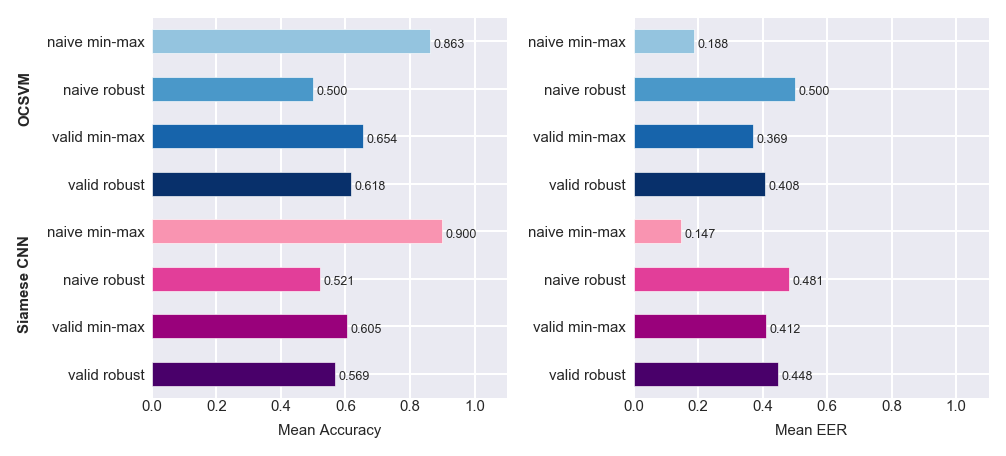

In [9]:
# Robust vs. MinMax
plot_metrics(df_plot[df_plot["approach"].isin(["naive min-max", "naive robust", "valid min-max", "valid robust"])])
utils_save_plot(plt, REPORT_PATH / "buech2019-approach-comparison-subset-robust.pdf")

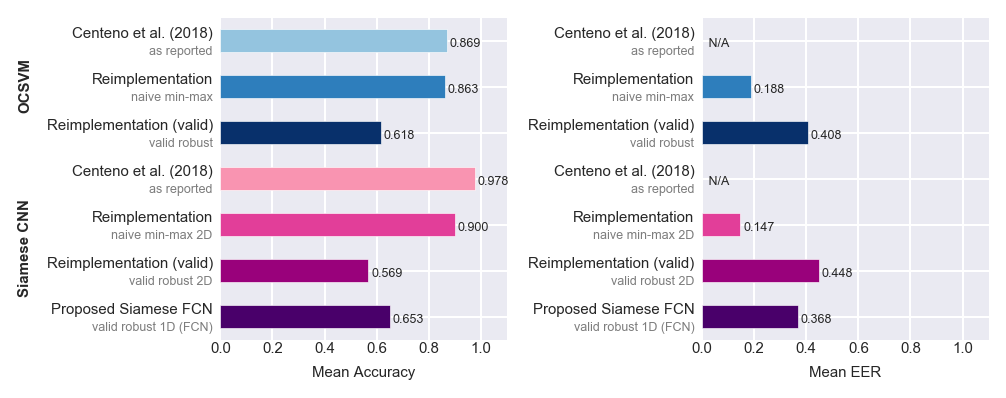

In [10]:
# ALL major models
df_plot_renamed = df_plot[
    df_plot["approach"].isin(
        ["naive min-max", "Centeno et al. (2018)", "valid robust fcn", "valid robust"]
    )
].copy()
df_plot_renamed["approach"] = (
    df_plot_renamed["approach"]
    .str.replace("naive min-max", "Reimplementation")
    .replace("valid robust", "Reimplementation (valid)")
    .replace("valid robust fcn", "Proposed Siamese FCN")
)

plot_metrics(
    df_plot_renamed,
    ticklabels=[
        "as reported",
        "naive min-max",
        "valid robust",
        "as reported",
        "naive min-max 2D",
        "valid robust 2D",
        "valid robust 1D (FCN)",
    ][::-1],
)
utils_save_plot(plt, REPORT_PATH / "buech2019-approach-comparison.pdf")